In [3]:
import io
import json
import numpy as np
import boto3
from matplotlib import pyplot
from matplotlib.legend_handler import HandlerTuple
from matplotlib import cm

NS_TO_MS = 1000000

In [20]:
file = {
  "body": "{\"start\": 1669401160.9225278, \"stop\": [1669401173.336103, 1669401172.976516], \"start_recognizeFaces\": [1669401163.6937869, 1669401164.1664958, 1669401164.0487788, 1669401163.688189, 1669401164.0538433], \"bucket\": \"dsworkflowtestgr9\", \"runtime_fetchImage\": 2048745216, \"runtime_createCollage\": [2927610122, 2563517187], \"runtime_recognizeFaces\": [1859922331, 1690243790, 2396191506, 1078841678, 3221231224], \"runtime_cropSortFaces\": [757302551, 711974310, 945319335, 750453474, 1471425359], \"start_createCollage\": [1669401170.4081209, 1669401170.4129953], \"start_cropSortFaces\": [1669401166.1207337, 1669401166.4111967, 1669401166.9995916, 1669401165.3733633, 1669401167.8218873]}"
}
json_input = json.loads(file["body"])


start = json_input["start"]  # int
stop = json_input["stop"]  # list

runtime_fetchImage = json_input["runtime_fetchImage"] / NS_TO_MS  # int
runtime_recognizeFaces = [x / NS_TO_MS for x in json_input["runtime_recognizeFaces"]]  # list
runtime_cropSortFaces = [x / NS_TO_MS for x in json_input["runtime_cropSortFaces"]]  # list
runtime_createCollage = [x / NS_TO_MS for x in json_input["runtime_createCollage"]]  # list

start_recognizeFaces = [(x - start)*1000 for x in json_input["start_recognizeFaces"]]  # list
start_cropSortFaces = [(x  - start)*1000 for x in json_input["start_cropSortFaces"]]  # list
start_createCollage = [(x  - start)*1000 for x in json_input["start_createCollage"]]  # list

# lists of input for easier iterating
runtime_list = [runtime_recognizeFaces, runtime_cropSortFaces, runtime_createCollage]
start_list = [start_recognizeFaces, start_cropSortFaces, start_createCollage]
runtime_labels = ["Total Runtime",
                  "Runtime fetchImage",
                  "Runtime recognizeFaces",
                  "Runtime cropSortFaces",
                  "Runtime createCollage"]
total_runtime = (max(stop) - start)*1000

In [21]:
print(total_runtime)
print(start_recognizeFaces)

12413.575172424316
[2771.259069442749, 3243.9680099487305, 3126.250982284546, 2765.6612396240234, 3131.3154697418213]


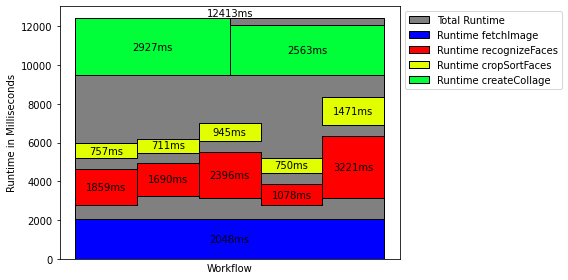

In [31]:
plt, ax = pyplot.subplots(1, 1,figsize=(8,4))
X = 1
t = ax.bar(X - 0.1, total_runtime, color="grey", width=1, linewidth=1.0, edgecolor="black")
rf = ax.bar(X - 0.1, runtime_fetchImage, color="blue", width=1, linewidth=1.0, edgecolor="black")

bottom = runtime_fetchImage
rts = [t, rf]
for i, l in enumerate(runtime_list):
    width = 1 / len(l)
    offset = len(l) / 2 * width if len(l) % 2 > 0 else len(l) / 2 * width - 0.15
    color = cm.hsv(i / 16 * len(runtime_list))

    temp_tup = ()
    for j, runtime in enumerate(l):
        tmp = ax.bar(X - offset + j * width, runtime, width=width, bottom=start_list[i][j], linewidth=1.0,
                     edgecolor="black", color=color, align="center")
        temp_tup += (tmp,)
    rts.append(temp_tup)
    bottom += max(l)

for i,rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.annotate(xy=(rect.get_x() + rect.get_width() / 2., rect.get_y() + height / 2 if i > 0 else height+height/50),
                ha='center',
                va='center',
                xytext=(0, 0),
                textcoords='offset points',
                text=f"{int(height)}ms")

ax.legend(rts, runtime_labels, handler_map={tuple: HandlerTuple()}, bbox_to_anchor=(1, 1), loc="upper left")
ax.set_ylabel("Runtime in Milliseconds")
ax.set_xlabel("Workflow")
ax.set_xticks([])
plt.tight_layout()